In [1]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hyperparam_scan_util import GridScan
pd.set_option('display.max_columns', None)

In [2]:
scan = GridScan.load("main_v3", root="results")

df_filename = "analysis.parquet"

# Comment this out if you don't need to reload and export the trials
scan.export_trials_df(df_filename, loading_progress=True)

trials_df = scan.load_exported_trials_df(df_filename)
trials_df.info()

Loading trials for scan main_v3...


100%|██████████| 19/19 [00:04<00:00,  4.13it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 124 entries, run_id to metrics.train_time_std
dtypes: float64(91), int64(27), object(6)
memory usage: 18.5+ KB


In [3]:
trials_df.head()

,run_id,config_hash,started_at,finished_at,duration,error,config.device_count,config.seed,config.tau,config.I0,config.eps,config.Nout,config.w_scale,config.T,config.K,config.dt,config.gamma,config.Nbatch,config.tau_lr,config.beta1,config.beta2,config.p_flip,config.Nepochs,config.Ntrain,config.Nin,config.Kin,config.Nsamples,config.Nhidden,config.Nlayer,config.lr,metrics.acc_init_mean,metrics.acc_init_std,metrics.acc_final_mean,metrics.acc_final_std,metrics.acc_min_epoch,metrics.acc_min_mean,metrics.acc_min_std,metrics.acc_max_epoch,metrics.acc_max_mean,metrics.acc_max_std,metrics.acc_ord_init_mean,metrics.acc_ord_init_std,metrics.acc_ord_final_mean,metrics.acc_ord_final_std,metrics.acc_ord_min_epoch,metrics.acc_ord_min_mean,metrics.acc_ord_min_std,metrics.acc_ord_max_epoch,metrics.acc_ord_max_mean,metrics.acc_ord_max_std,metrics.activity_init_mean,metrics.activity_init_std,metrics.activity_final_mean,metrics.activity_final_std,metrics.activity_min_epoch,metrics.activity_min_mean,metrics.activity_min_std,metrics.activity_max_epoch,metrics.activity_max_mean,metrics.activity_max_std,metrics.activity_first_init_mean,metrics.activity_first_init_std,metrics.activity_first_final_mean,metrics.activity_first_final_std,metrics.activity_first_min_epoch,metrics.activity_first_min_mean,metrics.activity_first_min_std,metrics.activity_first_max_epoch,metrics.activity_first_max_mean,metrics.activity_first_max_std,metrics.epoch_time_mean,metrics.epoch_time_std,metrics.init_compile_time_mean,metrics.init_compile_time_std,metrics.init_optim_time_mean,metrics.init_optim_time_std,metrics.init_phi0_time_mean,metrics.init_phi0_time_std,metrics.init_time_mean,metrics.init_time_std,metrics.init_weights_time_mean,metrics.init_weights_time_std,metrics.loss_init_mean,metrics.loss_init_std,metrics.loss_final_mean,metrics.loss_final_std,metrics.loss_min_epoch,metrics.loss_min_mean,metrics.loss_min_std,metrics.loss_max_epoch,metrics.loss_max_mean,metrics.loss_max_std,metrics.loss_ord_init_mean,metrics.loss_ord_init_std,metrics.loss_ord_final_mean,metrics.loss_ord_final_std,metrics.loss_ord_min_epoch,metrics.loss_ord_min_mean,metrics.loss_ord_min_std,metrics.loss_ord_max_epoch,metrics.loss_ord_max_mean,metrics.loss_ord_max_std,metrics.silent_neurons_init_mean,metrics.silent_neurons_init_std,metrics.silent_neurons_final_mean,metrics.silent_neurons_final_std,metrics.silent_neurons_min_epoch,metrics.silent_neurons_min_mean,metrics.silent_neurons_min_std,metrics.silent_neurons_max_epoch,metrics.silent_neurons_max_mean,metrics.silent_neurons_max_std,metrics.silent_neurons_first_init_mean,metrics.silent_neurons_first_init_std,metrics.silent_neurons_first_final_mean,metrics.silent_neurons_first_final_std,metrics.silent_neurons_first_min_epoch,metrics.silent_neurons_first_min_mean,metrics.silent_neurons_first_min_std,metrics.silent_neurons_first_max_epoch,metrics.silent_neurons_first_max_mean,metrics.silent_neurons_first_max_std,metrics.train_time_mean,metrics.train_time_std
0,20240915_181607,108e1b4376942df187983125ba0c2423,2024-09-15_19-00-21_380329,2024-09-15_19-07-35_951608,434.571280,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,700,80,3,100,2,0.004,0.048168,0.005538,0.146091,0.010292,0,0.048168,0.005538,81,0.162488,0.004661,0.044865,0.001159,0.043007,0.003819,91,0.041458,0.00219,12,0.050751,0.003586,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1.291191,0.004638,0.000523,0.000024,0.001847,0.000048,0.000520,0.000030,3.026823,0.167414,0.001345,0.000333,3.144310,0.004380,2.822465,0.008585,97,2.819659,0.003715,0,3.144310,0.004380,3.012916,0.0,3.012916,0.0,0,3.012916,0.0,0,3.012916,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,129.119110,0.463789
1,20240915_181607,1f0861d6260a27f587f1affadfde440d,2024-09-15_18-23-18_835990,2024-09-15_18-30-23_997497,425.161506,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,700,80,3,200,2,

## Error Summary

In [4]:
n_error = trials_df["error"].notna().sum()
print(f"{n_error} / {len(trials_df)} trials contain errors")
print()

for i, error in enumerate(trials_df["error"].dropna().sort_values().unique()):
    short_error = str(error).split("---", 1)[0].strip().split("\n")[-1]
    print(short_error)
    trials = trials_df[trials_df["error"] == error]
    print(f"Appears in {len(trials)} trials: {trials['config_hash'].tolist()}")
    print()

0 / 19 trials contain errors



In [5]:
from spikegd.utils.plotting import LinePlot, PlotGrid


def key_format(key: str):
    return key.removeprefix("config.").removeprefix("metrics.")


indep_keys = tuple(
    key for key in trials_df.columns
    if key.startswith("config.") and key != "config.Nin"
)
print("independent keys:", indep_keys)

# PlotGrid(
#     arg_keys=("config.Nt",),
#     func_keys=(
#         "metrics.acc_max_mean",
#         "metrics.epoch_time_mean"
#     ),
#     plot_type=LinePlot(
#         graph_key="config.Nbatch",
#         x_scale="log",
#     ),
#     col_key="config.Nin_virtual",
#     whitelists={"config.Nin_virtual": [8, 16, 24]},
#     indep_keys=indep_keys,
#     key_format=key_format,
# ).show(trials_df)

independent keys: ('config.device_count', 'config.seed', 'config.tau', 'config.I0', 'config.eps', 'config.Nout', 'config.w_scale', 'config.T', 'config.K', 'config.dt', 'config.gamma', 'config.Nbatch', 'config.tau_lr', 'config.beta1', 'config.beta2', 'config.p_flip', 'config.Nepochs', 'config.Ntrain', 'config.Kin', 'config.Nsamples', 'config.Nhidden', 'config.Nlayer', 'config.lr')


## Best trials

In [6]:
trials_df.sort_values("metrics.acc_max_mean", ascending=False).head(10)

,run_id,config_hash,started_at,finished_at,duration,error,config.device_count,config.seed,config.tau,config.I0,config.eps,config.Nout,config.w_scale,config.T,config.K,config.dt,config.gamma,config.Nbatch,config.tau_lr,config.beta1,config.beta2,config.p_flip,config.Nepochs,config.Ntrain,config.Nin,config.Kin,config.Nsamples,config.Nhidden,config.Nlayer,config.lr,metrics.acc_init_mean,metrics.acc_init_std,metrics.acc_final_mean,metrics.acc_final_std,metrics.acc_min_epoch,metrics.acc_min_mean,metrics.acc_min_std,metrics.acc_max_epoch,metrics.acc_max_mean,metrics.acc_max_std,metrics.acc_ord_init_mean,metrics.acc_ord_init_std,metrics.acc_ord_final_mean,metrics.acc_ord_final_std,metrics.acc_ord_min_epoch,metrics.acc_ord_min_mean,metrics.acc_ord_min_std,metrics.acc_ord_max_epoch,metrics.acc_ord_max_mean,metrics.acc_ord_max_std,metrics.activity_init_mean,metrics.activity_init_std,metrics.activity_final_mean,metrics.activity_final_std,metrics.activity_min_epoch,metrics.activity_min_mean,metrics.activity_min_std,metrics.activity_max_epoch,metrics.activity_max_mean,metrics.activity_max_std,metrics.activity_first_init_mean,metrics.activity_first_init_std,metrics.activity_first_final_mean,metrics.activity_first_final_std,metrics.activity_first_min_epoch,metrics.activity_first_min_mean,metrics.activity_first_min_std,metrics.activity_first_max_epoch,metrics.activity_first_max_mean,metrics.activity_first_max_std,metrics.epoch_time_mean,metrics.epoch_time_std,metrics.init_compile_time_mean,metrics.init_compile_time_std,metrics.init_optim_time_mean,metrics.init_optim_time_std,metrics.init_phi0_time_mean,metrics.init_phi0_time_std,metrics.init_time_mean,metrics.init_time_std,metrics.init_weights_time_mean,metrics.init_weights_time_std,metrics.loss_init_mean,metrics.loss_init_std,metrics.loss_final_mean,metrics.loss_final_std,metrics.loss_min_epoch,metrics.loss_min_mean,metrics.loss_min_std,metrics.loss_max_epoch,metrics.loss_max_mean,metrics.loss_max_std,metrics.loss_ord_init_mean,metrics.loss_ord_init_std,metrics.loss_ord_final_mean,metrics.loss_ord_final_std,metrics.loss_ord_min_epoch,metrics.loss_ord_min_mean,metrics.loss_ord_min_std,metrics.loss_ord_max_epoch,metrics.loss_ord_max_mean,metrics.loss_ord_max_std,metrics.silent_neurons_init_mean,metrics.silent_neurons_init_std,metrics.silent_neurons_final_mean,metrics.silent_neurons_final_std,metrics.silent_neurons_min_epoch,metrics.silent_neurons_min_mean,metrics.silent_neurons_min_std,metrics.silent_neurons_max_epoch,metrics.silent_neurons_max_mean,metrics.silent_neurons_max_std,metrics.silent_neurons_first_init_mean,metrics.silent_neurons_first_init_std,metrics.silent_neurons_first_final_mean,metrics.silent_neurons_first_final_std,metrics.silent_neurons_first_min_epoch,metrics.silent_neurons_first_min_mean,metrics.silent_neurons_first_min_std,metrics.silent_neurons_first_max_epoch,metrics.silent_neurons_first_max_mean,metrics.silent_neurons_first_max_std,metrics.train_time_mean,metrics.train_time_std
5,20240915_181607,862a995abe1688b87d7291eb7f98ad7d,2024-09-15_18-52-42_419136,2024-09-15_19-00-20_561420,458.142285,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,700,80,3,300,3,0.001,0.047556,0.003208,0.154838,0.010698,26,0.047357,0.003810,81,0.174751,0.008303,0.044865,0.001159,0.043007,0.003819,91,0.041458,0.00219,12,0.050751,0.003586,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1.355757,0.020597,0.000523,0.000018,0.008922,0.009393,0.013544,0.018468,4.470345,1.467791,0.047115,0.064204,3.135426,0.008958,2.758106,0.014061,97,2.751523,0.012553,0,3.135426,0.008958,3.012916,0.0,3.012916,0.0,0,3.012916,0.0,0,3.012916,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,135.575623,2.059708
16,20240915_181607,df7c9bbfae848f098ca2fcfe325e6060,2024-09-15_20-21-30_791737,2024-09-15_20-28-57_170737,446.379000,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,700,80,3,300,

In [7]:
best_trial = trials_df.loc[trials_df["metrics.acc_max_mean"].idxmax()]
print("===== BEST TRIAL =====")
print(best_trial[[
    "config_hash", "duration",
    *indep_keys,
    "metrics.acc_max_mean", "metrics.acc_max_std", "metrics.acc_max_epoch"
]])

===== BEST TRIAL =====
config_hash              862a995abe1688b87d7291eb7f98ad7d
duration                                       458.142285
config.device_count                                     1
config.seed                                             0
config.tau                                       1.909859
config.I0                                            1.25
config.eps                                       0.000001
config.Nout                                            20
config.w_scale                                        0.5
config.T                                              2.0
config.K                                              300
config.dt                                           0.001
config.gamma                                         0.01
config.Nbatch                                        1000
config.tau_lr                                       100.0
config.beta1                                          0.9
config.beta2                                     

Look at accuracy evolution over epochs:

===== BEST TRIAL 0 =====
Max accuracy: 0.1748 ± 0.0083


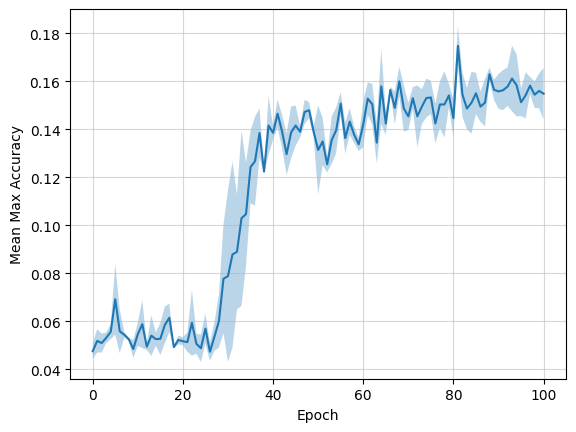

===== BEST TRIAL 1 =====
Max accuracy: 0.1718 ± 0.0068


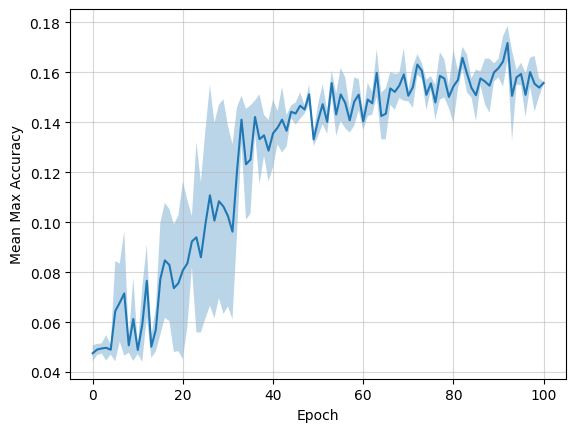

===== BEST TRIAL 2 =====
Max accuracy: 0.1696 ± 0.0064


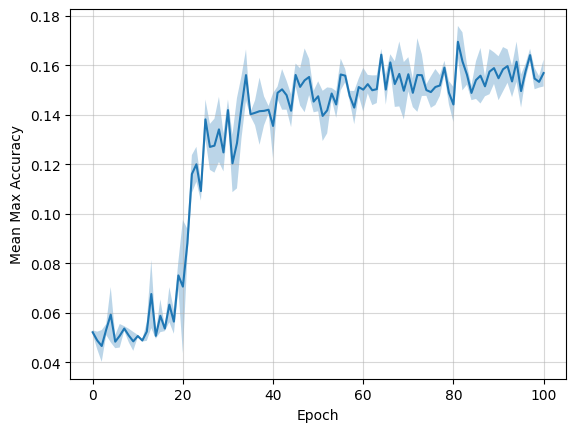

===== BEST TRIAL 3 =====
Max accuracy: 0.1689 ± 0.0059


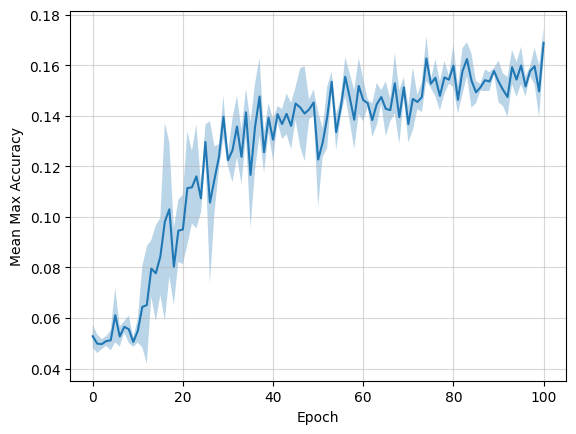

In [8]:
def plot_training_curves(config_hash):
    trial = scan.load_trial(config_hash)
    epoch_metrics: list = trial.metrics["epochs"]
    
    epochs = np.arange(len(epoch_metrics))
    acc_mean = np.array([metrics["acc_mean"] for metrics in epoch_metrics])
    acc_std = np.array([metrics["acc_std"] for metrics in epoch_metrics])
    
    fig, ax = plt.subplots()

    ax.plot(epochs, acc_mean)
    ax.fill_between(epochs, acc_mean - acc_std, acc_mean + acc_std, alpha=0.3)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Mean Max Accuracy")
    ax.grid(alpha=0.5)

    plt.show()

best_trials = trials_df \
    .sort_values("metrics.acc_max_mean", ascending=False, ignore_index=True) \
    .head(4)

for i, best_trial in best_trials.iterrows():
    print(f"===== BEST TRIAL {i} =====")
    print(f"Max accuracy: {best_trial['metrics.acc_max_mean']:.4f} ± {best_trial['metrics.acc_max_std']:.4f}")
    plot_training_curves(best_trial["config_hash"])